**Import the utilities file :**  This file contains all necessary helper functions that will be required for out implementations additionally it also imports necessary qiskit modules into the current environment.

In [3]:
%run quantum_permutation_utils.py
from quantum_permutation_utils import *

## Secret Sharing using Quantum Permuatation Generation
###### In this short tutorial we will describe the quantum permutation algorithm that we have used for the game.

### Introduction

#### <u>An algorithm to generate permutations</u>

The main idea follows from the classical permutation generation algorithms, where the our aim is to generate all possible permutation of a given string of elements. For eg. all possible permutations of the string '123' would be '132', '132', '213', '231', '312' and '123'. In general any string of $n$ distinct elements will have $n!$ different permutations.

 Most permutation generating algorithms work by iteratively transposing (swapping) two elements of the string to generate all possible permutation of the elements for eg. [Heap's algorithm](https://en.wikipedia.org/wiki/Heap%27s_algorithm). However, here we will take a slightly different approach, which might be a bit ineffecient when comapred to existing algorithms but is a better match to use for our secret sharing protocol.

Let's understand the algorithm through an example. 

Say we have to generate all possible permutations of the initial string, $s_0$: '123'.  

To do this we define to define two permutation operations $\mathcal{\hat{P}_2}$ and $\mathcal{\hat{P}_3}$ where their action on the string is given by 
$$  \mathcal{\hat{P_2}}\; (123) = (213) $$ 
$$  \mathcal{\hat{P_3}}\; (123) = (312) $$

It is clear that the action of $\mathcal{\hat{P}_2}$ is to swap the element at the first and second postion and whereas the action of $\mathcal{\hat{P}_3}$ is to circulate the three elements one unit to the right. Note that we can also define integral powers of these operators as operating them on the string an integer number of times.

For eg.
$$  \mathcal{\hat{P}^2_2} (123) = \mathcal{\hat{P}_2}\mathcal{\hat{P}_2} (123) = \mathcal{\hat{P}_2}(213) = (123) $$
$$  \mathcal{\hat{P}^2_3} (123) = \mathcal{\hat{P}_3}\mathcal{\hat{P}_3} (123) = \mathcal{\hat{P}_2} (312) = (231) \:\;\: \:\;\: \:\;\: \mathcal{\hat{P}^3_3} (123) = \mathcal{\hat{P}_3} \mathcal{\hat{P}^2_3} (123) = \mathcal{\hat{P}_3} (231) = (123)        $$

Note that the action of $\mathcal{\hat{P}^2_2}$ and $\mathcal{\hat{P}^3_3}$ is same as that of doing nothing, which we may express as $\mathcal{\hat{I}}$ the identity operator.

Given these operators, we claim that the by composing these appropriate powers of them we can generate all 6 (3!) permutations of the input string. Consider the follwoing set of composition of the operators $ \{ \mathcal{\hat{I}},  \mathcal{\hat{P}_2} \} $  and $\{ \mathcal{\hat{I}}, \mathcal{\hat{P}_3}, \mathcal{\hat{P}^2_3}  \}$ i.e 
$$  \mathcal{P} =  \{ \mathcal{\hat{I}}, \mathcal{\hat{P}_3}, \mathcal{\hat{P}^2_3}  \} \cdot \{ \mathcal{\hat{I}},  \mathcal{\hat{P}_2} \}  =  \{ \mathcal{\hat{I}}, \mathcal{\hat{P}_3}, \mathcal{\hat{P}^2_3}, \mathcal{\hat{P}_2}, \mathcal{\hat{P}_3}\mathcal{\hat{P}_2}, \mathcal{\hat{P}^2_3}\mathcal{\hat{P}_2}      \}$$

Now consider the action of all the operators in $\mathcal{P}$ over the initial state '123' : 
$$ \mathcal{I}(123) = (123) \;\:\:\;\:\ \mathcal{\hat{P}_3}(123) = (312) \;\:\:\;\:\ \mathcal{\hat{P}^2_3}(123) = (231) \;\:\:\;\:\ \mathcal{\hat{P}_2}(123) = (213) \;\:\:\;\:\ \mathcal{\hat{P}_3}\mathcal{\hat{P}_2}(123) = (321) \;\:\:\;\:\  \mathcal{\hat{P}^2_3}\mathcal{\hat{P}_2}(123) = (132)
$$
Thus we have succesfully generated all possible permutations of the input string 

**!VISUALS-NEEDED!** : To depict the permutation operation for this case 

The above described method can be easily be generalised easily for a string of any size, all that will be required are sufficient no. of permutations operators. For a string of 'n' of distinct elements we need of n-1 permutation operators $\{ \mathcal{\hat{P}_2}, \mathcal{\hat{P}_3} . . . \mathcal{\hat{P}_n} \}$, where any operator $\mathcal{\hat{P}_j}$ can be raised to powers between $\{ 0,1.. j-1 \}$. The set of possible by permutations $\mathcal{P}$ will be then given by composing all different powers of the different permutation operators, as 
$$  \mathcal{P} = \{ \mathcal{I}, \mathcal{\hat{P}_n}, \mathcal{\hat{P}^2_n} . . . \mathcal{\hat{P}^{n-1}_n}  \}\cdot. . .\cdot \{ \mathcal{\hat{I}}, \mathcal{\hat{P}_3}, \mathcal{\hat{P}^2_3}  \} \cdot \{ \mathcal{\hat{I}},  \mathcal{\hat{P}_2} \}  $$

One can esily verify that the above composition yeilds in total $n!$ distinct operations for the set $\mathcal{P}$, thus ensuring that all possible permutations are generated.

Note that it is possible to generate the set of possible permutations $\mathcal{P}$ using only the swap operation on different position of the data strings, however we use the method described here to keep things in track with our protocol. But this fact will have its effect in the quantum version of the protocl, as any permutation operator $\mathcal{\hat{P}_j}$ will be implemented using composition of swap operations. 

#### <u>A Quantum version of the algorithm</u>

Designing a 'quantum' version of this algorithm won't be difficult as we have already defined the procedure in terms of operators which can be easily implemented on gate-based quantum computers like **IBM Quantum** , this follows from the fact that the permutation operators are unitary. However our aim is a bit more subtle here, as we intend to prepare a state in an *'equal superposition of all possible permutations'* of the input string which will be later on used as a funndamental unit of our secret charing protocol.  

**For example :**  let's say we are given the initial state $\ket{\psi_0}$ which is product of two distinct single qubit states $ \{ \ket{\phi_1}, \ket{\phi_2} \}$, say
$$ \ket{\psi_0}  = \ket{\phi_1}\ket{\phi_2} $$
Now the only other possible permutation of the single qubit states would be $ \ket{\phi_2}\ket{\phi_1} $. So by *'equal superpostion of all possible permutations'* we seek a state of the form
$$  \frac{1}{\sqrt{2}} \big( \ket{\phi_1}\ket{\phi_2} + \ket{\phi_2}\ket{\phi_1}   \big)   $$

However, note that a transformation like this 
$$   \ket{\phi_1}\ket{\phi_2} \to  \frac{1}{\sqrt{2}} \big( \ket{\phi_1}\ket{\phi_2} + \ket{\phi_2}\ket{\phi_1} \big) $$ 
is not unitary, thus cannot be implemented on a gate-based device. Though a particular permutation might be implemented easily using the pre-defined permutation operators, for eg. $\hat{P}_2 \ket{\phi_1}\ket{\phi_2} = \ket{\phi_2}\ket{\phi_1} $

So, we use a slighly different trick to get through this difficulty. We start by intorducing an ancilla qubit in the $\ket{+} = \ket{0} + \ket{1}$ state and acting the $\hat{P}_2$ operator upon the data qubits controlled by the ancilla, i.e 
$$   \ket{\phi_1}\ket{\phi_2}\ket{0} + \ket{\phi_1}\ket{\phi_2}\ket{1} \; \to \;  \hat{I}\big( \ket{\phi_1}\ket{\phi_2} \big) \ket{0} + \hat{P}_{2} \big( \ket{\phi_1}\ket{\phi_2} \big)\ket{1}  \; = \;  \ket{\phi_1}\ket{\phi_2}\ket{0} + \ket{\phi_2}\ket{\phi_1}\ket{1}  $$
The above transformation is unitary and can be realised using quantum computers. The essential trick here was to use the ancilla qubits to control the action of the permutation operator on the data qubits, this same trick will be helpful in generalising this procedure later, but before let's implemeent it in qiskit.
###### *(here we ignored the overall normalisation factors)*

**Qiksit Implementation**: The above procedure can be easily implemented in qiskit

We initiate the state with $\ket{\phi_1} = 0$ and $\ket{\phi_2} = 1$, which will be contained in the `msg` register. Also we use an ancilla `cntrl` to controls the swap operation.

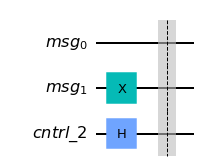

In [2]:
## circuit initialisation ~
qreg = QuantumRegister(2, name= 'msg')
ancilla = QuantumRegister(1, name= 'cntrl_2')
qc = QuantumCircuit(qreg, ancilla)

## state initialisation ~
qc.x(qreg[1])
qc.h(ancilla)
qc.barrier()
qc.draw(output= 'mpl')

Next we generate hte required permutation operator, whihc in this case will be $\hat{P}_2$

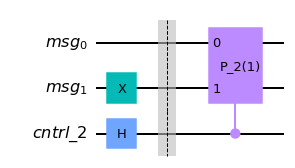

In [3]:
## generate the permutation operator ~
p2 = generate_permutation_operators(2)

## apply the permutation operator conditioned on the `cntrl`
qc.append(p2.control(1), [ancilla, qreg[0], qreg[1]] )

qc.draw(output= 'mpl')

Let's know measure and check the state of the `msg` and `cntrl` qubits.

{'0 10': 462, '1 01': 562}


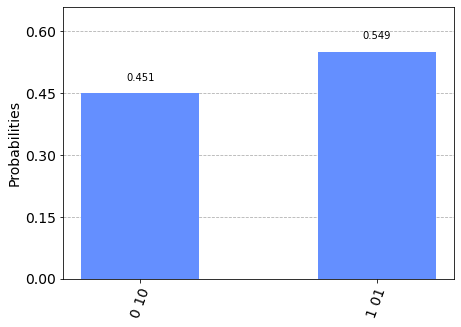

In [4]:
measure_and_plot(qc, show_counts= True, measure_ancilla= True, ancilla_specifier= 'all')

 The first bit indicates the state of the `cntrl` register and rest indicates the state of the `msg` register. Here, the '`0 10`' state corresponds the state where the states are not permuted wheras the '`1 10`' state correspond the permuted state.

 ###### *NB: Here we will follow the standatrd big-endian notation as used in qiskit*

Similarly we could generate permutations for 3-bit strings also, using two different ancilla registers which will condition the action of the permutation operators $ \{ \hat{P}_2, \hat{P}_3\}$. Given the states $\{ \ket{\phi_1} , \ket{\phi_2} , \ket{\phi_3} \} $, the action of the conditioned permutation operators can be shown as 
- $\:\; \hat{P}^0_3\hat{P}^0_2\ket{ \phi_1\phi_2\phi_3} \ket{0}\ket{0} \to \ket{ \phi_1\phi_2\phi_3} \ket{0}\ket{0} $ 
- $\:\; \hat{P}^1_3\hat{P}^0_2\ket{ \phi_1\phi_2\phi_3} \ket{1}\ket{0} \to \ket{ \phi_3\phi_1\phi_2} \ket{1}\ket{0} $
- $\:\:\;\;  .  $
- $\:\;\;\;  .. $
- $\:\; \hat{P}^2_3\hat{P}^1_2\ket{ \phi_1\phi_2\phi_3} \ket{2}\ket{1} \to \ket{ \phi_1\phi_3\phi_2} \ket{2}\ket{1} $ 


Together they will transform the initial state as follows,
$$ \big(\ket{\phi_1\phi_2\phi_3}\big) \big( \ket{0}+\ket{1}+\ket{2} \big) \big( \ket{0} + \ket{1} \big)  \:\; \to \;\: \ket{\phi_1\phi_2\phi_3}\ket{0}\ket{0} + \ket{\phi_3\phi_1\phi_2}\ket{1}\ket{0} + ... \ket{\phi_1\phi_3\phi_2}\ket{2}\ket{1}
$$

**Generalisation :** Following through the patterns in the above example we can write the general transformation for any arbitrary number of qubits
$$  \big( \ket{\phi_1\phi_2 ...\phi_n}  \big) \otimes \ket{k_n}\ket{k_{n-1}} . . . \ket{k_2}  \:\;\: \to \:\;\:  \hat{P}^{k_n}_n\hat{P}^{k_{n-1}}_{n-1}. . \hat{P}^{k_2}_{2}  \big( \ket{\phi_1\phi_2 ...\phi_n}  \big) \otimes \ket{k_n}\ket{k_{n-1}} . . . \ket{k_2} $$

Thus the equal superposition of possible permutations can be written as 
$$  \mathcal{\hat{P}}\{\phi_1, \phi_2 . . \phi_n \}  =  \sum_{k_n \in \{0,1,. . n-1\}, k_{n-1} \in \{0,1.. n-2 \} . . k_2 \in \{0,1\} } \frac{1}{\sqrt{n!}} \:\; \hat{P}^{k_n}_n\hat{P}^{k_{n-1}}_{n-1}. . \hat{P}^{k_2}_{2}  \big( \ket{\phi_1\phi_2 ...\phi_n}  \big) \otimes \ket{k_n}\ket{k_{n-1}} . . . \ket{k_2}
$$

The above mentioned procedure is generalisable and also easily implementable on current day quantum computers as we will see in the examples below.
A measure of the required resources can be easily obtained. Observe that any control ancilla $\ket{k_j}$ can take only $j$ distinct integral values which could be represented by atmost $\lceil log j \rceil$ qubits, now since there are n different such control ancillas we have in total $\lceil log\: 2 \rceil + \lceil log\: 3 \rceil + . . . + \lceil log\: n  \rceil \approx log(n!) $ ancilla qubits and $n$ qubits to represent the data itself amounting to an overall of $ log(n!) + n \approx O(n\:log(n))$ qubits.  
Refer to [How to implement a gate that generate a uniform superposition of all permutation of element](https://quantumcomputing.stackexchange.com/questions/11682/generate-a-quantum-state-that-sums-up-all-permutations-of-elements) for an insightful discussion on the possible ways of generating superposition of the permutation of qubit states.

Now we give an example of permuting a 3 qubit state, and some of the problems that might arise in practise thereof ,

We start by initialising the state using $\ket{\phi_1} = \ket{1}$, $\ket{\phi_2} = \ket{0}$, $\ket{\phi_0} = \ket{1}$

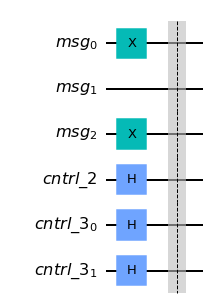

In [7]:
## circuit initialisation ~
qreg = QuantumRegister(3, name= 'msg')
cntrl_2 = QuantumRegister(1, name= 'cntrl_2')
cntrl_3 = QuantumRegister(2, name= 'cntrl_3')
qc = QuantumCircuit(qreg, cntrl_2, cntrl_3)

## state initialisation ~
qc.x(qreg[0])
qc.x(qreg[2])
 
## caontrol initialisation ~ 
qc.h(cntrl_2)
qc.h(cntrl_3)

qc.barrier()
qc.draw(output= 'mpl')

Next we generate the required permutation operators $\{\hat{P}_2 \}$ and  $ \{ \hat{P}_3, \hat{P}^2_3  \}$

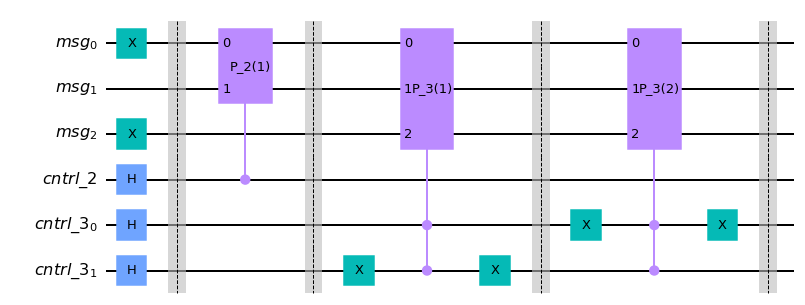

In [8]:
## generate the permutation operator ~
p2 = generate_permutation_operators(2) ## P_2
p3 = generate_permutation_operators(3) ## P_3
p3_2 = generate_permutation_operators(3,2) ##  P^2_3

## apply the permutation operators conditioned on the `cntrl` registers
qc.append(p2.control(1), [cntrl_2, qreg[0], qreg[1]] )

qc.barrier()
append_permutation_operator(p3, 1, qc, qreg, cntrl_3)

qc.barrier()
append_permutation_operator(p3_2, 2, qc, qreg, cntrl_3)

qc.barrier()
qc.draw(output= 'mpl')

Next we measure the circuit to obtain the genreate permutations. First we measure the `msg` qubits only to obtain,               

{'110': 397, '101': 358, '011': 269}


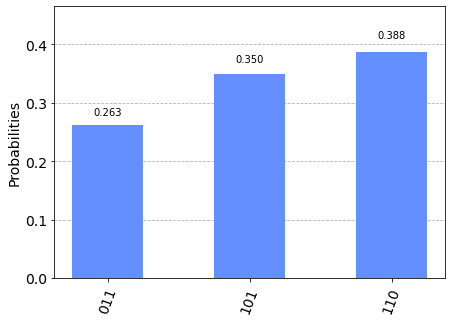

In [10]:
measure_and_plot(qc, show_counts= True, measure_ancilla= False)

Awh oh! it seems that the states are not in an equal superposition anymore. But what could have gone wrong ?

To answer this we measure and plot the states again but this time we also measure the qubits in `cntrl` register.

{'01 0 110': 121, '11 1 110': 136, '01 1 011': 116, '11 0 101': 124, '10 1 101': 137, '00 0 101': 127, '00 1 110': 128, '10 0 011': 135}


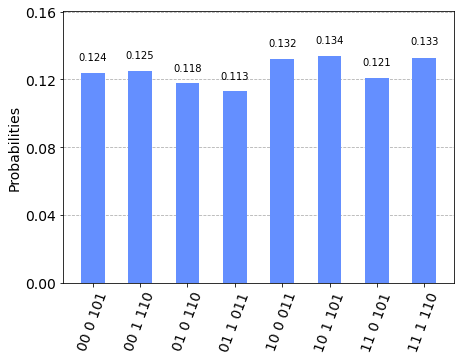

In [9]:
measure_and_plot(qc, show_counts= True, measure_ancilla= True, ancilla_specifier= 'all')

Well the histogram here look pretty uniform don't they ! But Can you spot the anomaly ? .. Ahaan! there are more than a single value of the `cntrl` bits that generates the same permutations of the states. For eg. both `01 1` and `10 0` generates the same state `011`

Similarly if we have a start we 3 distinct 



###### refer to https://quantumcomputing.stackexchange.com/questions/11682/generate-a-quantum-state-that-sums-up-all-permutations-of-elements for more details regarding this idea !